In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from useful_functions import import_file, remove_before, remove_zeros, make_bins, make_equal_bins, peaks_for_specific_timeframe, show_valid_peaks, make_sessions, calculate_session_averages, add_session_averages, surrounded_by_low_counts
from scipy.signal import find_peaks

In [2]:
P_01 = import_file('Alta', '2P01')
P_01.dropna(subset=['Count'], inplace=True)

In [3]:
print(P_01)

                    Date  Count
0    2024-05-01 08:04:15    0.0
1    2024-05-01 08:19:15    0.0
2    2024-05-01 08:33:23    3.0
3    2024-05-01 08:38:22   97.0
4    2024-05-01 08:43:22    0.0
...                  ...    ...
8929 2024-04-30 22:49:11    0.0
8930 2024-04-30 23:04:11    0.0
8931 2024-04-30 23:19:12    0.0
8932 2024-04-30 23:34:12    0.0
8933 2024-04-30 23:49:12    0.0

[8810 rows x 2 columns]


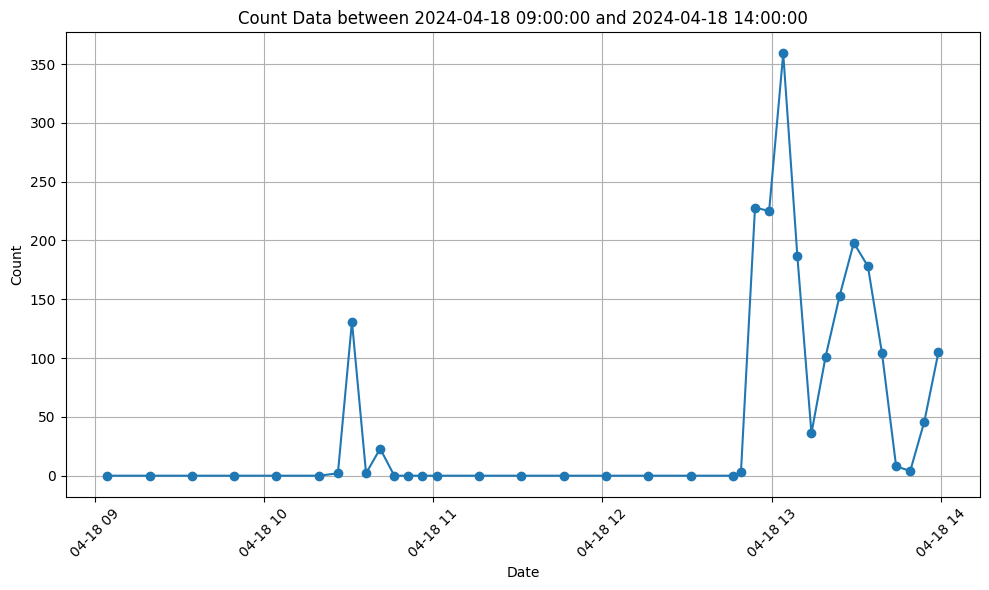

In [4]:
start_time = '2024-04-18 09:00:00'
end_time = '2024-04-18 14:00:00'
peaks_for_specific_timeframe(P_01, start_time, end_time)

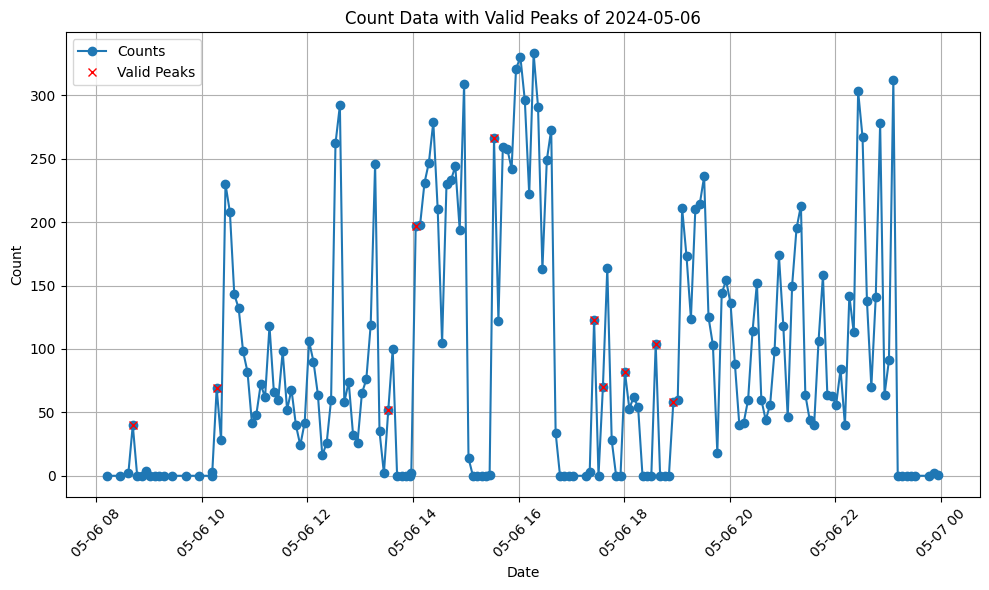

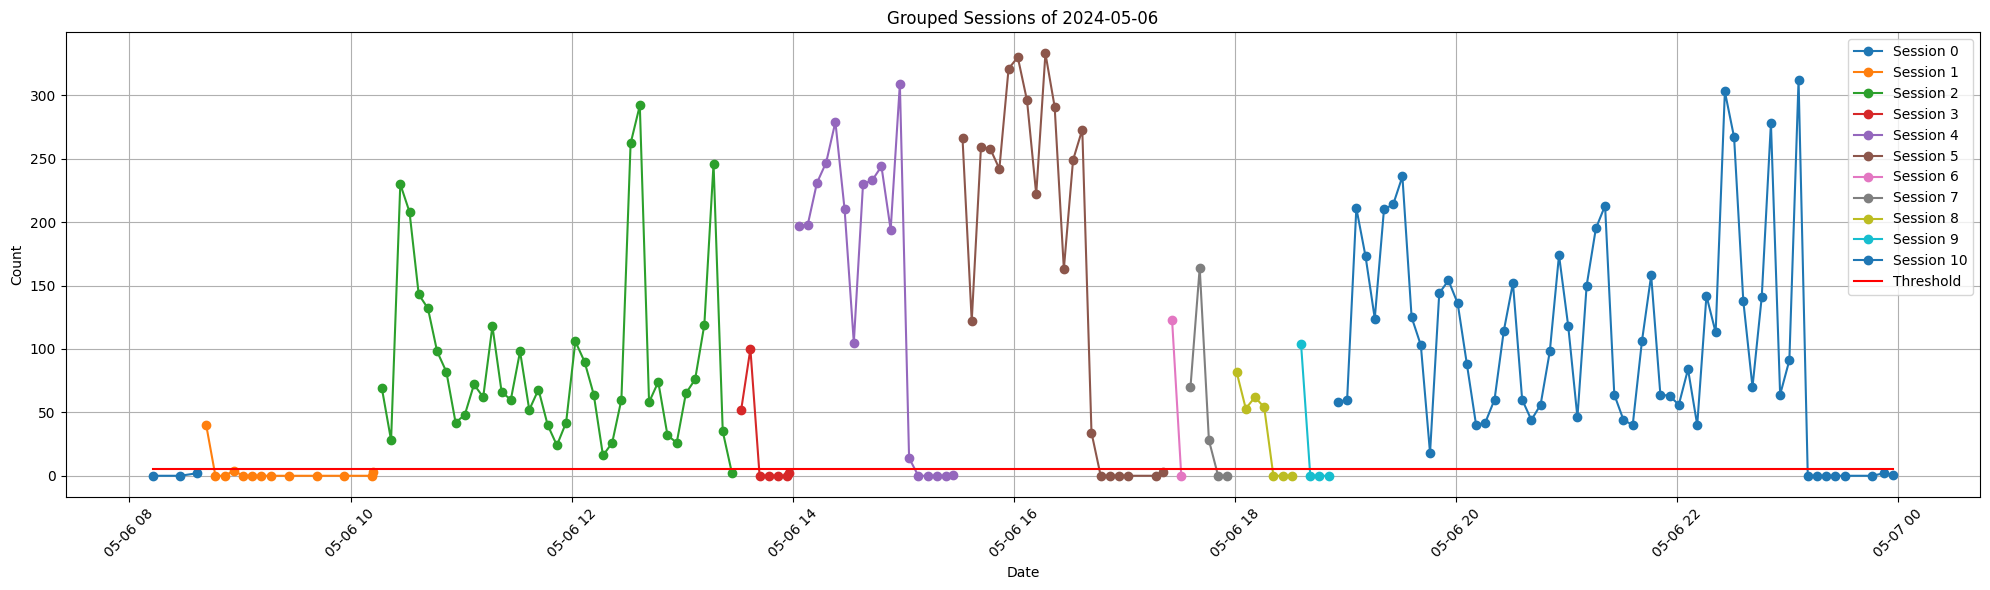

In [5]:
specific_day = '2024-05-06'
show_valid_peaks(P_01, specific_day, threshold=5, consecutive_points=1)


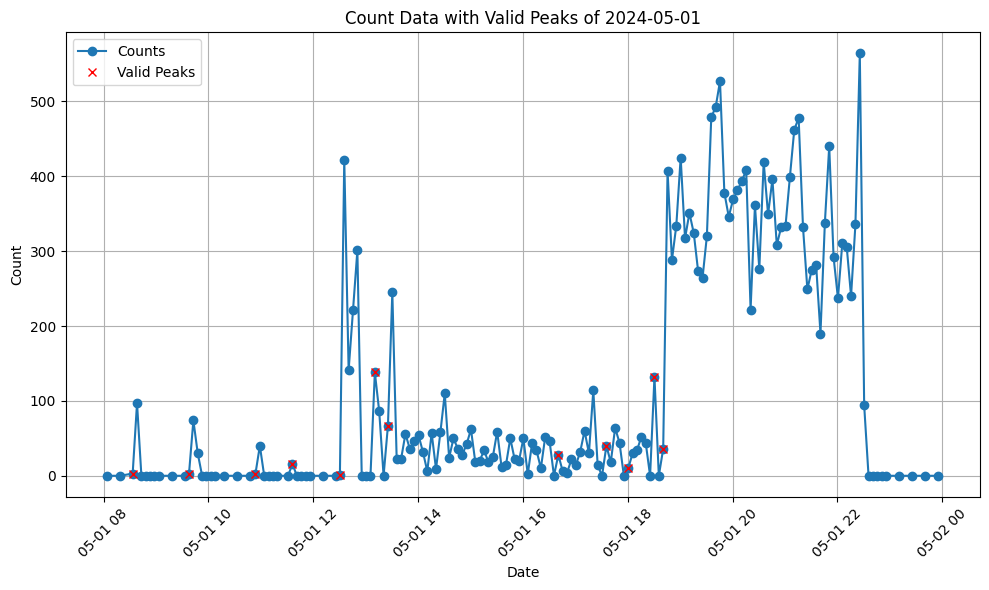

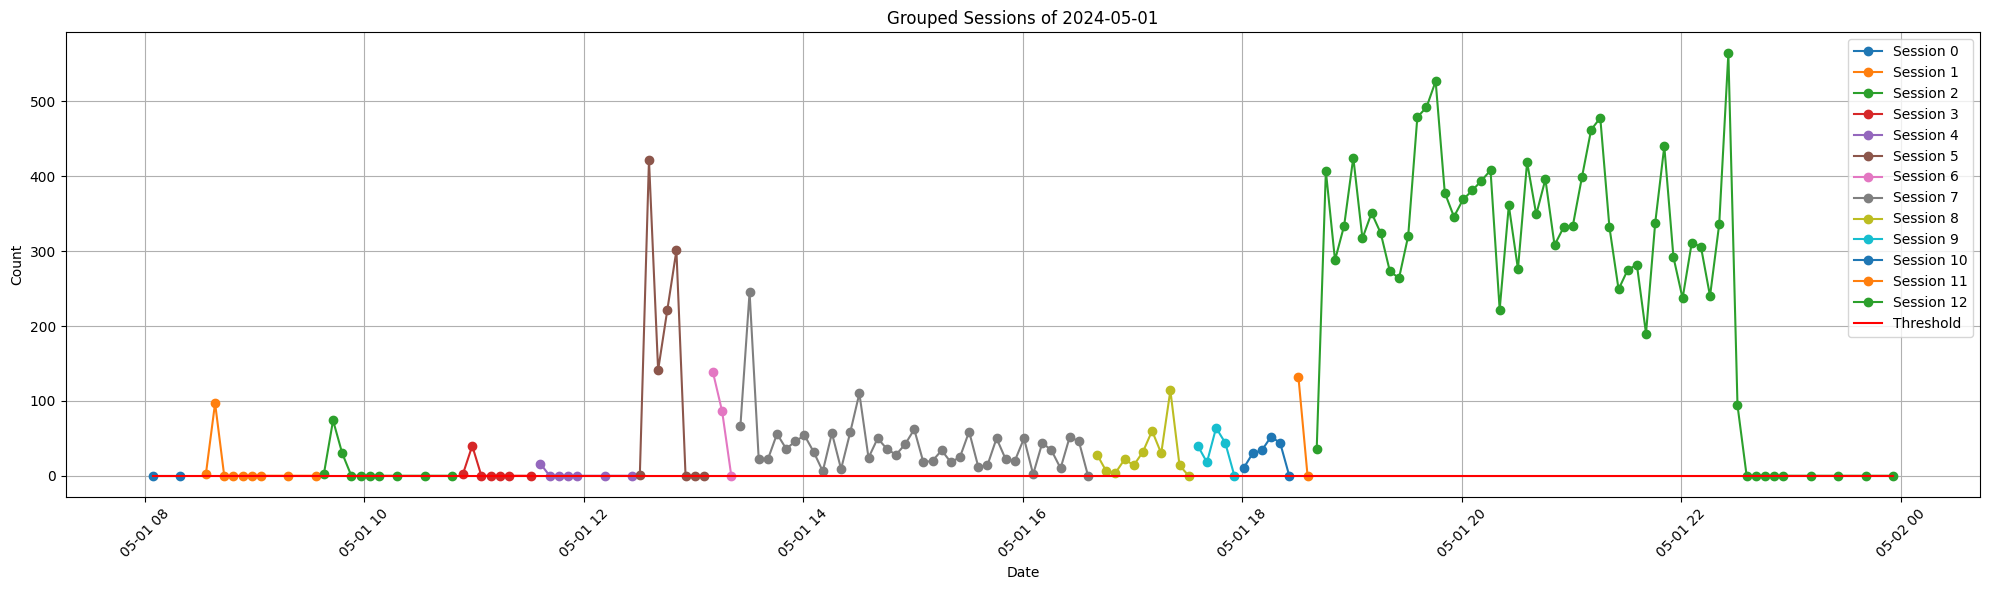

In [6]:
specific_day = '2024-05-01'
show_valid_peaks(P_01, specific_day, 0, 1)


In [7]:
B_55 = import_file('Locus', '2.B55')


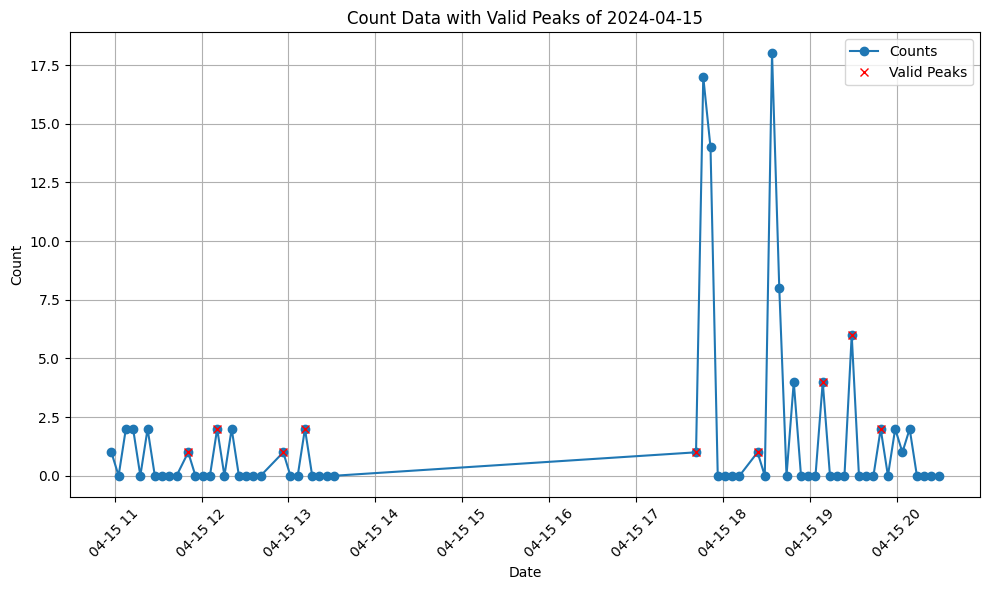

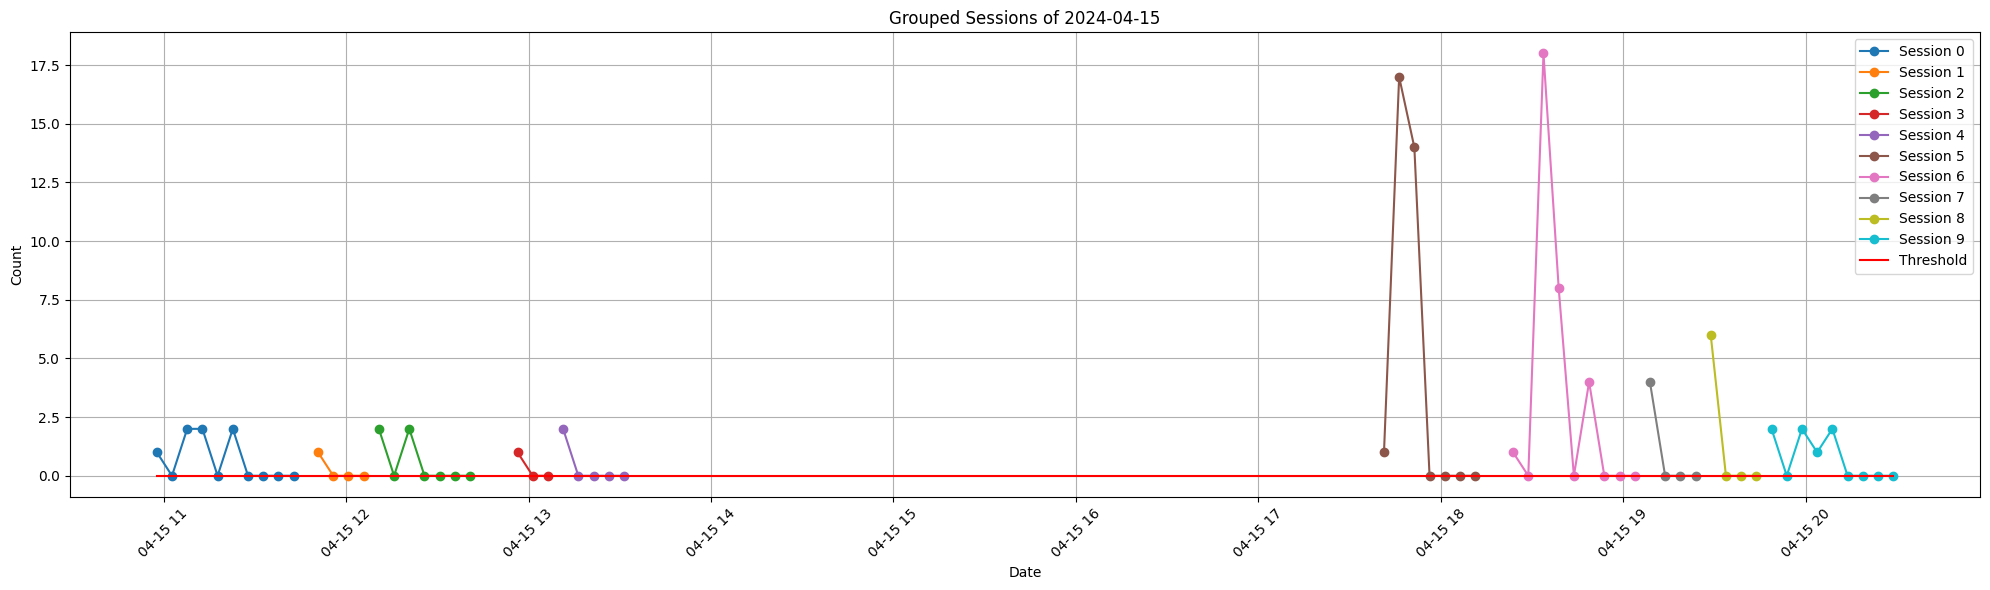

In [8]:
specific_day = '2024-04-15'
show_valid_peaks(B_55, specific_day, 0, 2)

In [9]:
new_P_01 = make_sessions(P_01, '2024-05-06', 5, 1)

In [10]:
print(new_P_01)

(                   Date  Count  Session
0   2024-05-06 08:12:36    0.0        0
1   2024-05-06 08:27:36    0.0        0
2   2024-05-06 08:36:39    2.0        0
3   2024-05-06 08:41:39   40.0        1
4   2024-05-06 08:46:39    0.0        1
..                  ...    ...      ...
173 2024-05-06 23:25:55    0.0       10
174 2024-05-06 23:30:55    0.0       10
175 2024-05-06 23:45:55    0.0       10
176 2024-05-06 23:52:11    2.0       10
177 2024-05-06 23:57:10    1.0       10

[178 rows x 3 columns], [3, 16, 55, 62, 80, 101, 103, 108, 115, 119])


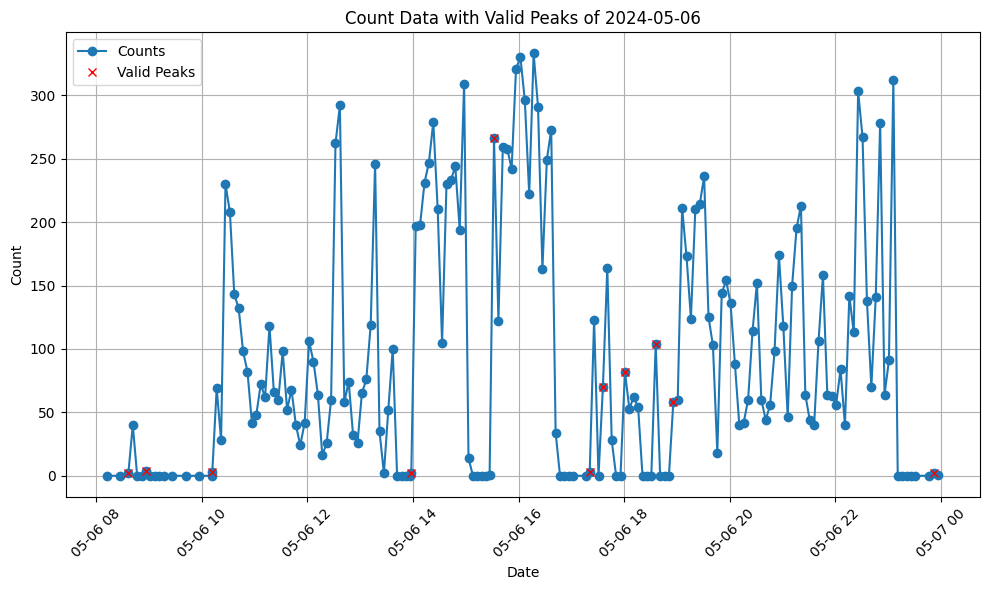

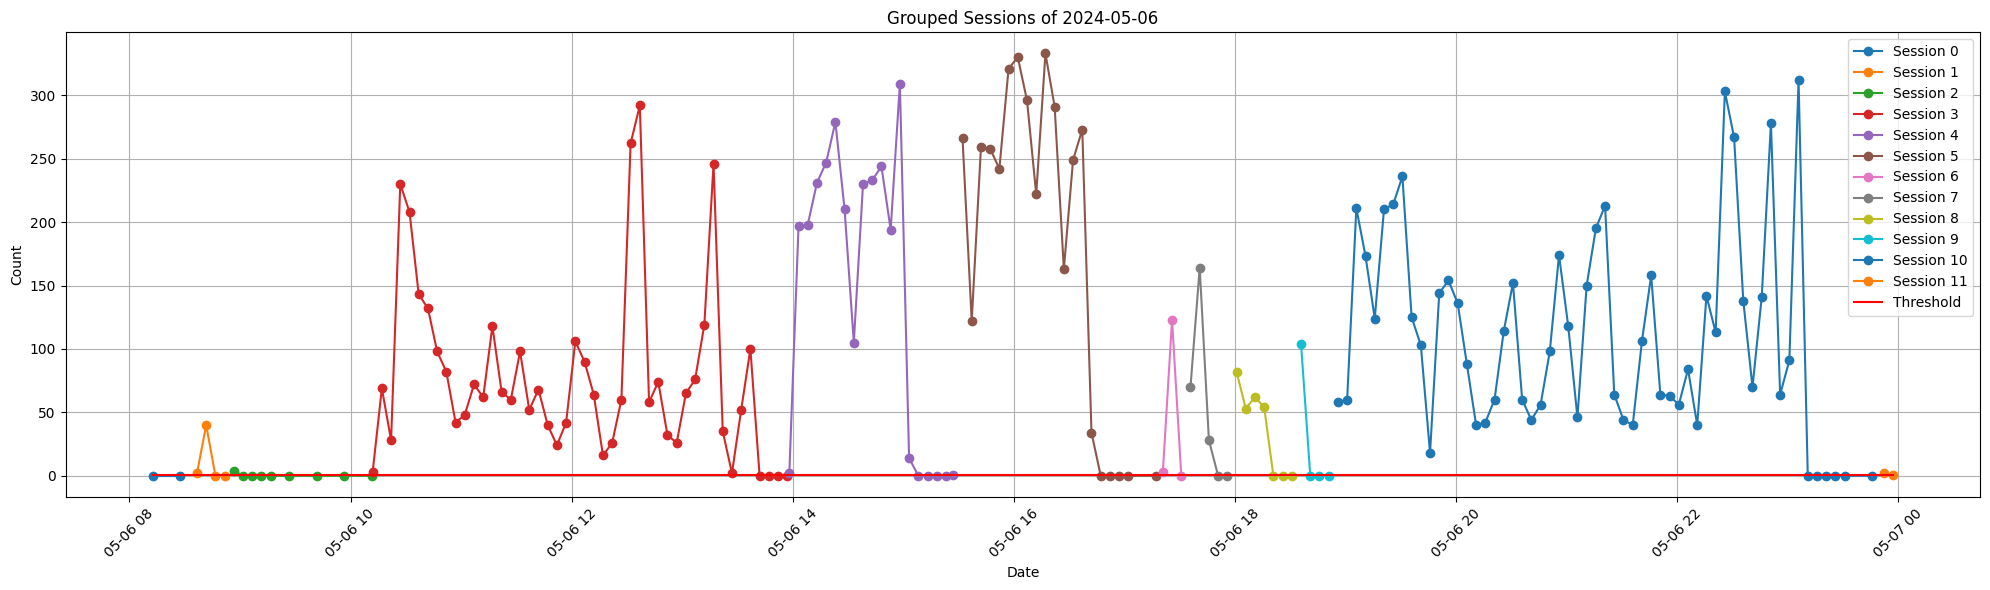

In [11]:
specific_day = '2024-05-06'
show_valid_peaks(P_01, specific_day, threshold=1, consecutive_points=1, offset=0)

In [12]:
specific_day = '2024-05-06'
filtered_data = make_sessions(P_01, specific_day, 1, 1, offset=0)[0]
print(add_session_averages(filtered_data))

                   Date  Count  Session  Session_Average
0   2024-05-06 08:12:36    0.0        0         0.000000
1   2024-05-06 08:27:36    0.0        0         0.000000
2   2024-05-06 08:36:39    2.0        1        10.500000
3   2024-05-06 08:41:39   40.0        1        10.500000
4   2024-05-06 08:46:39    0.0        1        10.500000
..                  ...    ...      ...              ...
173 2024-05-06 23:25:55    0.0       10       109.719298
174 2024-05-06 23:30:55    0.0       10       109.719298
175 2024-05-06 23:45:55    0.0       10       109.719298
176 2024-05-06 23:52:11    2.0       11         1.500000
177 2024-05-06 23:57:10    1.0       11         1.500000

[178 rows x 4 columns]


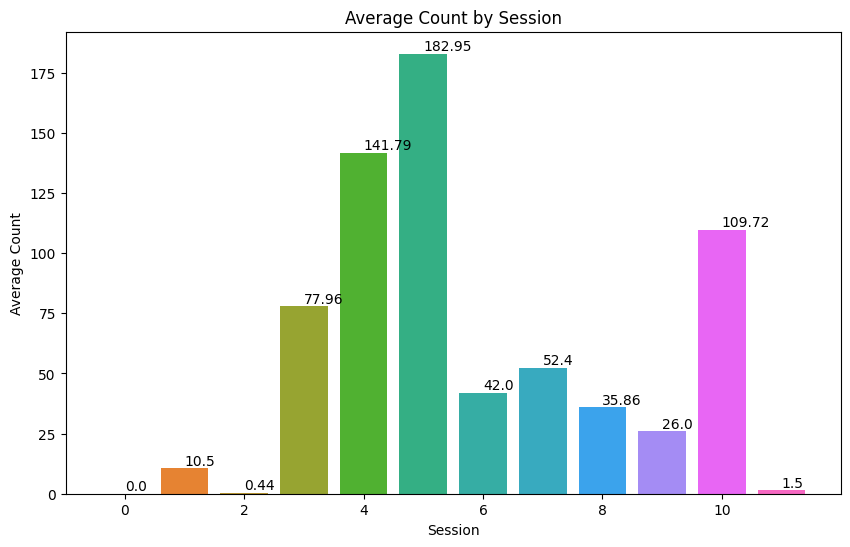

In [13]:
import seaborn as sns
# Group by 'Session' and calculate the mean of 'Count'
session_averages = filtered_data.groupby('Session')['Count'].mean().reset_index()

# Create a color palette
palette = sns.color_palette("husl", len(session_averages))

plt.figure(figsize=(10, 6))
bars = plt.bar(session_averages['Session'], session_averages['Count'], color=palette)

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom') # va: vertical alignment

plt.xlabel('Session')
plt.ylabel('Average Count')
plt.title('Average Count by Session')
plt.show()

In [14]:
target_data_file = pd.read_excel('Data_target/counts_alta.xlsx')
print(target_data_file)

    counts  people
0       73       5
1      362       5
2      314       5
3      322       5
4      325       5
..     ...     ...
75     151       4
76     163       4
77     247       4
78     168       4
79     392       4

[80 rows x 2 columns]


[0, 0, 5, 28, 31, 16]
people
2    160.40000
3    276.00000
4    225.83871
5    223.43750
Name: counts, dtype: float64


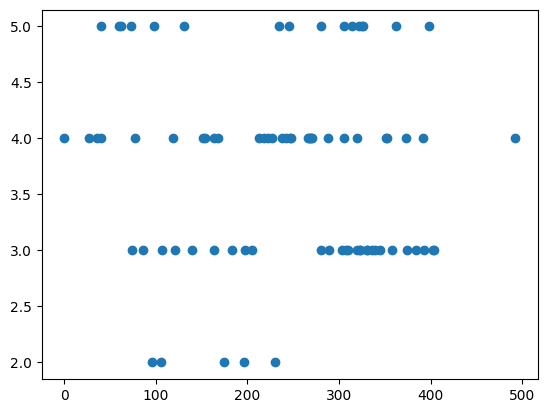

In [15]:
counts_amounts = []
for i in range(6):
    counts_amounts.append(len(target_data_file[target_data_file['people'] == i]))

amount_averages = target_data_file.groupby('people')['counts'].mean()
print(counts_amounts)
print(amount_averages)
counts = target_data_file['counts']
people = target_data_file['people']
plt.scatter(counts, people)
plt.show()

In [16]:
merged_sensor_data = pd.read_excel('Data_target/projectroom/merged_sensors_data.xlsx')

In [17]:
print(merged_sensor_data)

                   Date  Count_2P02  Count_2T01  Count_2T02  Count_2T03  \
0   2024-06-13 08:10:00         0.0         NaN         NaN         NaN   
1   2024-06-13 08:25:00         0.0         NaN         NaN         NaN   
2   2024-06-13 08:40:00         0.0         NaN         NaN         NaN   
3   2024-06-13 08:45:00         2.0         NaN         NaN         NaN   
4   2024-06-13 08:50:00        20.0         NaN         NaN         NaN   
..                  ...         ...         ...         ...         ...   
836 2024-06-17 23:00:00         0.0         NaN         0.0         0.0   
837 2024-06-17 23:05:00         0.0         NaN         0.0         0.0   
838 2024-06-17 23:15:00         0.0         NaN         NaN         NaN   
839 2024-06-17 23:30:00         0.0         NaN         NaN         NaN   
840 2024-06-17 23:45:00         0.0         NaN         NaN         NaN   

     Count_2T04  occupancy  
0           NaN          0  
1           NaN          0  
2           

In [18]:
alta_target = merged_sensor_data[['Date', 'Count_2P02', 'occupancy']]
print(alta_target)

                   Date  Count_2P02  occupancy
0   2024-06-13 08:10:00         0.0          0
1   2024-06-13 08:25:00         0.0          0
2   2024-06-13 08:40:00         0.0          0
3   2024-06-13 08:45:00         2.0          0
4   2024-06-13 08:50:00        20.0          0
..                  ...         ...        ...
836 2024-06-17 23:00:00         0.0          0
837 2024-06-17 23:05:00         0.0          0
838 2024-06-17 23:15:00         0.0          0
839 2024-06-17 23:30:00         0.0          0
840 2024-06-17 23:45:00         0.0          0

[841 rows x 3 columns]


   occupancy  Count_2P02
0          0   22.359447
1          1   81.517572
2          2  140.331754
3          3  186.806452


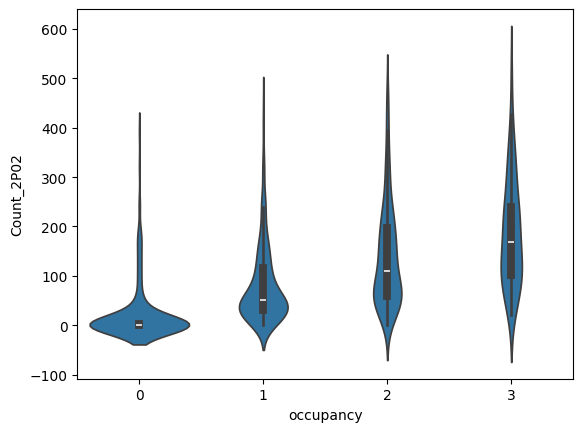

In [19]:
# alta_target.dropna(subset=['Count_2P02'], inplace=True)
# print(len(alta_target[alta_target['Count_2P02'].isna()]))
grouped_by_occ = alta_target.groupby('occupancy')['Count_2P02'].mean().reset_index()
print(grouped_by_occ)
sns.violinplot(x='occupancy', y='Count_2P02', data=alta_target)
plt.show()

                   Date  Count_2P02  occupancy
0   2024-06-13 08:10:00         0.0          0
1   2024-06-13 08:25:00         0.0          0
2   2024-06-13 08:40:00         0.0          0
3   2024-06-13 08:45:00         2.0          0
4   2024-06-13 08:50:00        20.0          0
..                  ...         ...        ...
836 2024-06-17 23:00:00         0.0          0
837 2024-06-17 23:05:00         0.0          0
838 2024-06-17 23:15:00         0.0          0
839 2024-06-17 23:30:00         0.0          0
840 2024-06-17 23:45:00         0.0          0

[841 rows x 3 columns]


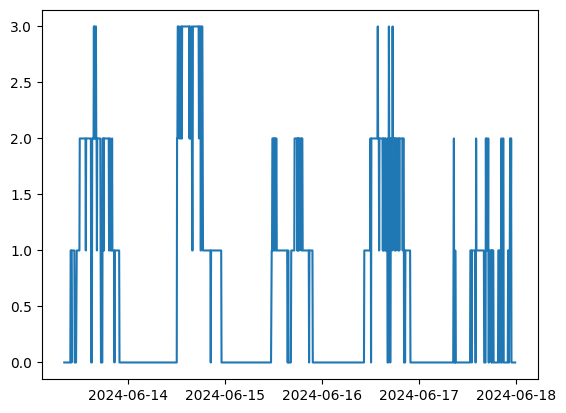

In [20]:
# alta_target['Date'] = pd.to_datetime(alta_target['Date'])
# mask = alta_target['Date'].dt.strftime('%Y-%m-%d') == '2024-06-17'
# filtered_data = alta_target.loc[mask]
print(alta_target)
plt.plot(alta_target['Date'], alta_target['occupancy'])
plt.show()

In [21]:
valid_peaks = [index for index in range(len(alta_target['Count_2P02'])) if surrounded_by_low_counts(index, alta_target['Count_2P02'], 0, 1) and alta_target['Count_2P02'][index] > 1]
print(valid_peaks)

[3, 30, 37, 76, 175, 302, 339, 364, 380, 412, 501, 538, 589, 668, 672, 679, 703, 715, 745, 761, 771, 823]


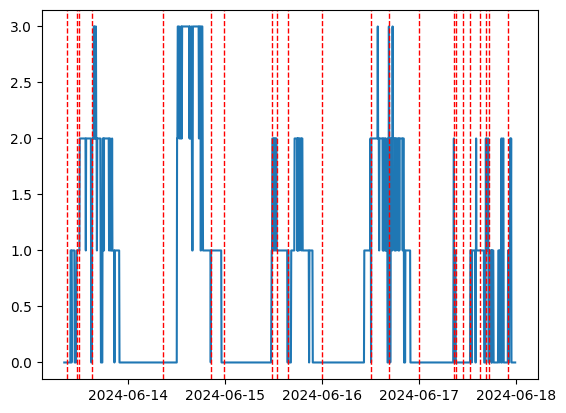

In [22]:
plt.plot(alta_target['Date'], alta_target['occupancy'])
for idx in valid_peaks:
    plt.axvline(x=alta_target['Date'].iloc[idx], color='r', linestyle='--', linewidth=1)
plt.show()

                   Date  Count_2P02  occupancy
503 2024-06-16 08:00:00         0.0          0
504 2024-06-16 08:15:00         0.0          0
505 2024-06-16 08:30:00         0.0          0
506 2024-06-16 08:45:00         0.0          0
507 2024-06-16 09:00:00         0.0          0
..                  ...         ...        ...
665 2024-06-16 23:10:00         0.0          0
666 2024-06-16 23:25:00         0.0          0
667 2024-06-16 23:40:00         0.0          0
668 2024-06-16 23:50:00         2.0          0
669 2024-06-16 23:55:00         0.0          0

[167 rows x 3 columns]
[538, 589, 668]


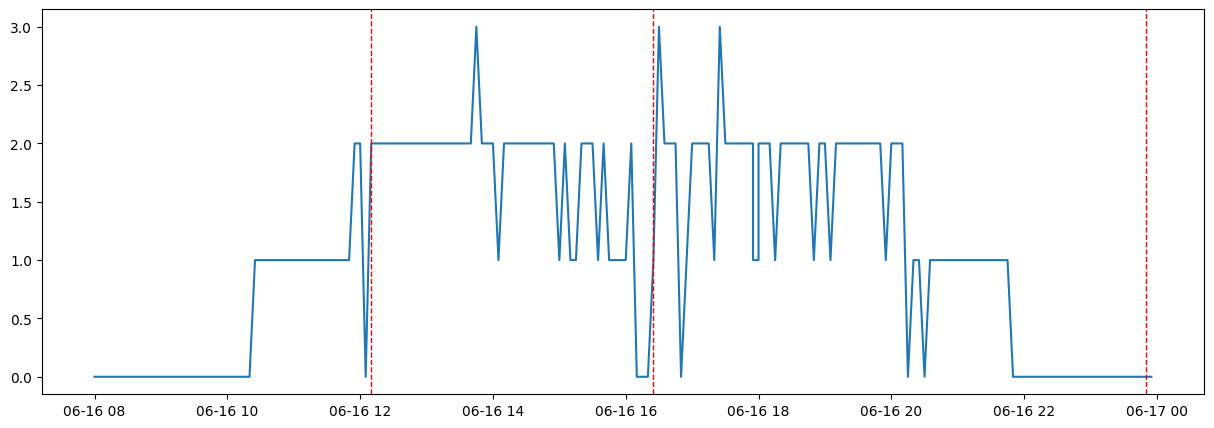

In [23]:
mask = alta_target['Date'].dt.strftime('%Y-%m-%d') == '2024-06-16'
filtered_data = alta_target.loc[mask]
print(filtered_data)

valid_peaks_filtered = [idx for idx in valid_peaks if idx in filtered_data.index]
print(valid_peaks_filtered)

plt.figure(figsize=(15, 5))
plt.plot(filtered_data['Date'], filtered_data['occupancy'])
for idx in valid_peaks_filtered:
    plt.axvline(x=alta_target['Date'].iloc[idx], color='r', linestyle='--', linewidth=1)
plt.show()

In [24]:
alta_target['Session'] = (alta_target.index.isin(valid_peaks)).cumsum()

/tmp/ipykernel_6169/3934429640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alta_target['Session'] = (alta_target.index.isin(valid_peaks)).cumsum()


In [25]:
print(alta_target)

                   Date  Count_2P02  occupancy  Session
0   2024-06-13 08:10:00         0.0          0        0
1   2024-06-13 08:25:00         0.0          0        0
2   2024-06-13 08:40:00         0.0          0        0
3   2024-06-13 08:45:00         2.0          0        1
4   2024-06-13 08:50:00        20.0          0        1
..                  ...         ...        ...      ...
836 2024-06-17 23:00:00         0.0          0       22
837 2024-06-17 23:05:00         0.0          0       22
838 2024-06-17 23:15:00         0.0          0       22
839 2024-06-17 23:30:00         0.0          0       22
840 2024-06-17 23:45:00         0.0          0       22

[841 rows x 4 columns]


In [35]:
target_grouped_occ = alta_target.groupby('Session')['occupancy'].mean()
target_grouped_count = alta_target.groupby('Session')['Count_2P02'].mean()

In [42]:
grouped_target = pd.concat((target_grouped_count, target_grouped_occ), axis=1)
print(grouped_target)

         Count_2P02  occupancy
Session                       
0          0.000000   0.000000
1         61.038462   0.407407
2         42.571429   1.000000
3        108.410256   1.769231
4         75.694737   1.303030
5        117.886179   1.889764
6         46.648649   0.837838
7          0.176471   0.000000
8        173.312500   1.625000
9         89.500000   0.968750
10        81.056818   1.000000
11        71.171429   0.594595
12       146.270833   1.725490
13        87.358974   1.341772
14         0.500000   0.000000
15        16.142857   0.428571
16         3.750000   0.000000
17         0.250000   0.000000
18        44.500000   0.933333
19        31.687500   0.687500
20       142.600000   1.200000
21       159.900000   0.576923
22        83.555556   0.611111


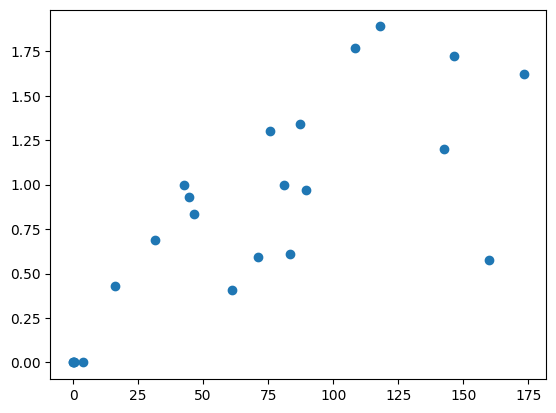

In [44]:
plt.scatter(grouped_target['Count_2P02'], grouped_target['occupancy'])
plt.show()

R-squared: 0.6041556795571044
Mean Squared Error (MSE): 0.13974832557699368
Root Mean Squared Error (RMSE): 0.37382927330132093
Mean Absolute Error (MAE): 0.3063945445790154


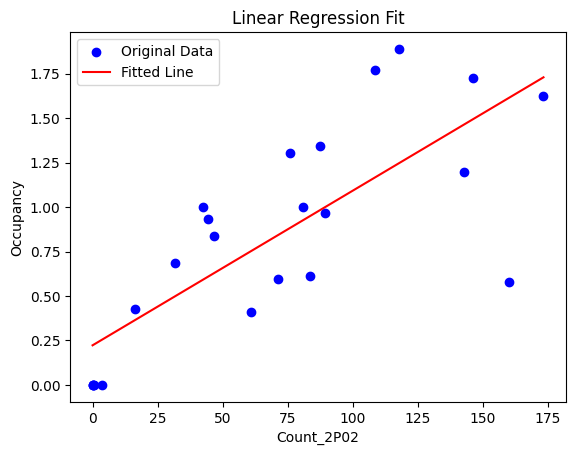

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Prepare the data for linear regression
X = grouped_target['Count_2P02'].values.reshape(-1, 1)  # Feature matrix (input)
y = grouped_target['occupancy'].values  # Target vector (output)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Get the line of best fit
line_x = np.linspace(X.min(), X.max(), 100)
line_y = model.predict(line_x.reshape(-1, 1))

# Plot the original data
plt.scatter(grouped_target['Count_2P02'], grouped_target['occupancy'], color='blue', label='Original Data')

# Plot the line of best fit
plt.plot(line_x, line_y, color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()